In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv


In [ ]:
from google import colab
from  google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install caer canaro

In [ ]:
import os
import caer
import canaro
import gc #for garbage collection

In [ ]:
img_size = (80,80)
channels = 1 #grayscaling
char_path = "/content/drive/MyDrive/Simpsons/SimpsonsDataset/simpsons_dataset"



In [ ]:
#bringing the top 10 characters which have most no. of images
char_dict = {}
for char in os.listdir(char_path):
  char_dict[char]=len(os.listdir(os.path.join(char_path , char))) #getting number of images in each folder in the dataset for each character then storing the top 10

#dorting in descending order
char_dict = caer.sort_dict(char_dict , descending = True)
char_dict

[('homer_simpson', 2246),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('moe_szyslak', 895),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('carl_carlson', 98),
 ('martin_prince', 71),
 ('cletus_spuckler', 47),
 ('agnes_skinner', 42),
 ('fat_tony', 27),
 ('gil', 27),
 ('miss_hoover', 17),
 ('disco_stu', 8),
 ('lionel_hutz', 3)]

In [ ]:
#grab names of first 10 elements and store that in a list
characters = []
count = 0
for i in char_dict:
  characters.append(i[0])
  count += 1
  if count >= 10:
    break

characters

['homer_simpson',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum',
 'abraham_grampa_simpson',
 'moe_szyslak']

In [ ]:
#create traaining data
train = caer.preprocess_from_dir(char_path , characters , channels = channels , IMG_SIZE = img_size  , isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.04526329040527344s
[INFO] At 1000 files
[INFO] 1354 files found in 0.02305006980895996s
[INFO] At 1000 files
[INFO] 1342 files found in 0.02521061897277832s
[INFO] At 1000 files
[INFO] 1291 files found in 0.02294921875s
[INFO] At 1000 files
[INFO] 1206 files found in 0.022198915481567383s
[INFO] At 1000 files
[INFO] 1193 files found in 0.0205533504486084s
[INFO] At 1000 files
[INFO] 1079 files found in 0.02052927017211914s
[INFO] 986 files found in 0.017606496810913086s
[INFO] 913 files found in 0.015562057495117188s
[INFO] 895 files found in 0.022693634033203125s
----------------------------------------------
[INFO] 12505 files preprocessed! Took 2m 56s


In [ ]:
 #to check no. og images
 len(train)

12505

In [ ]:
batch_size = 32

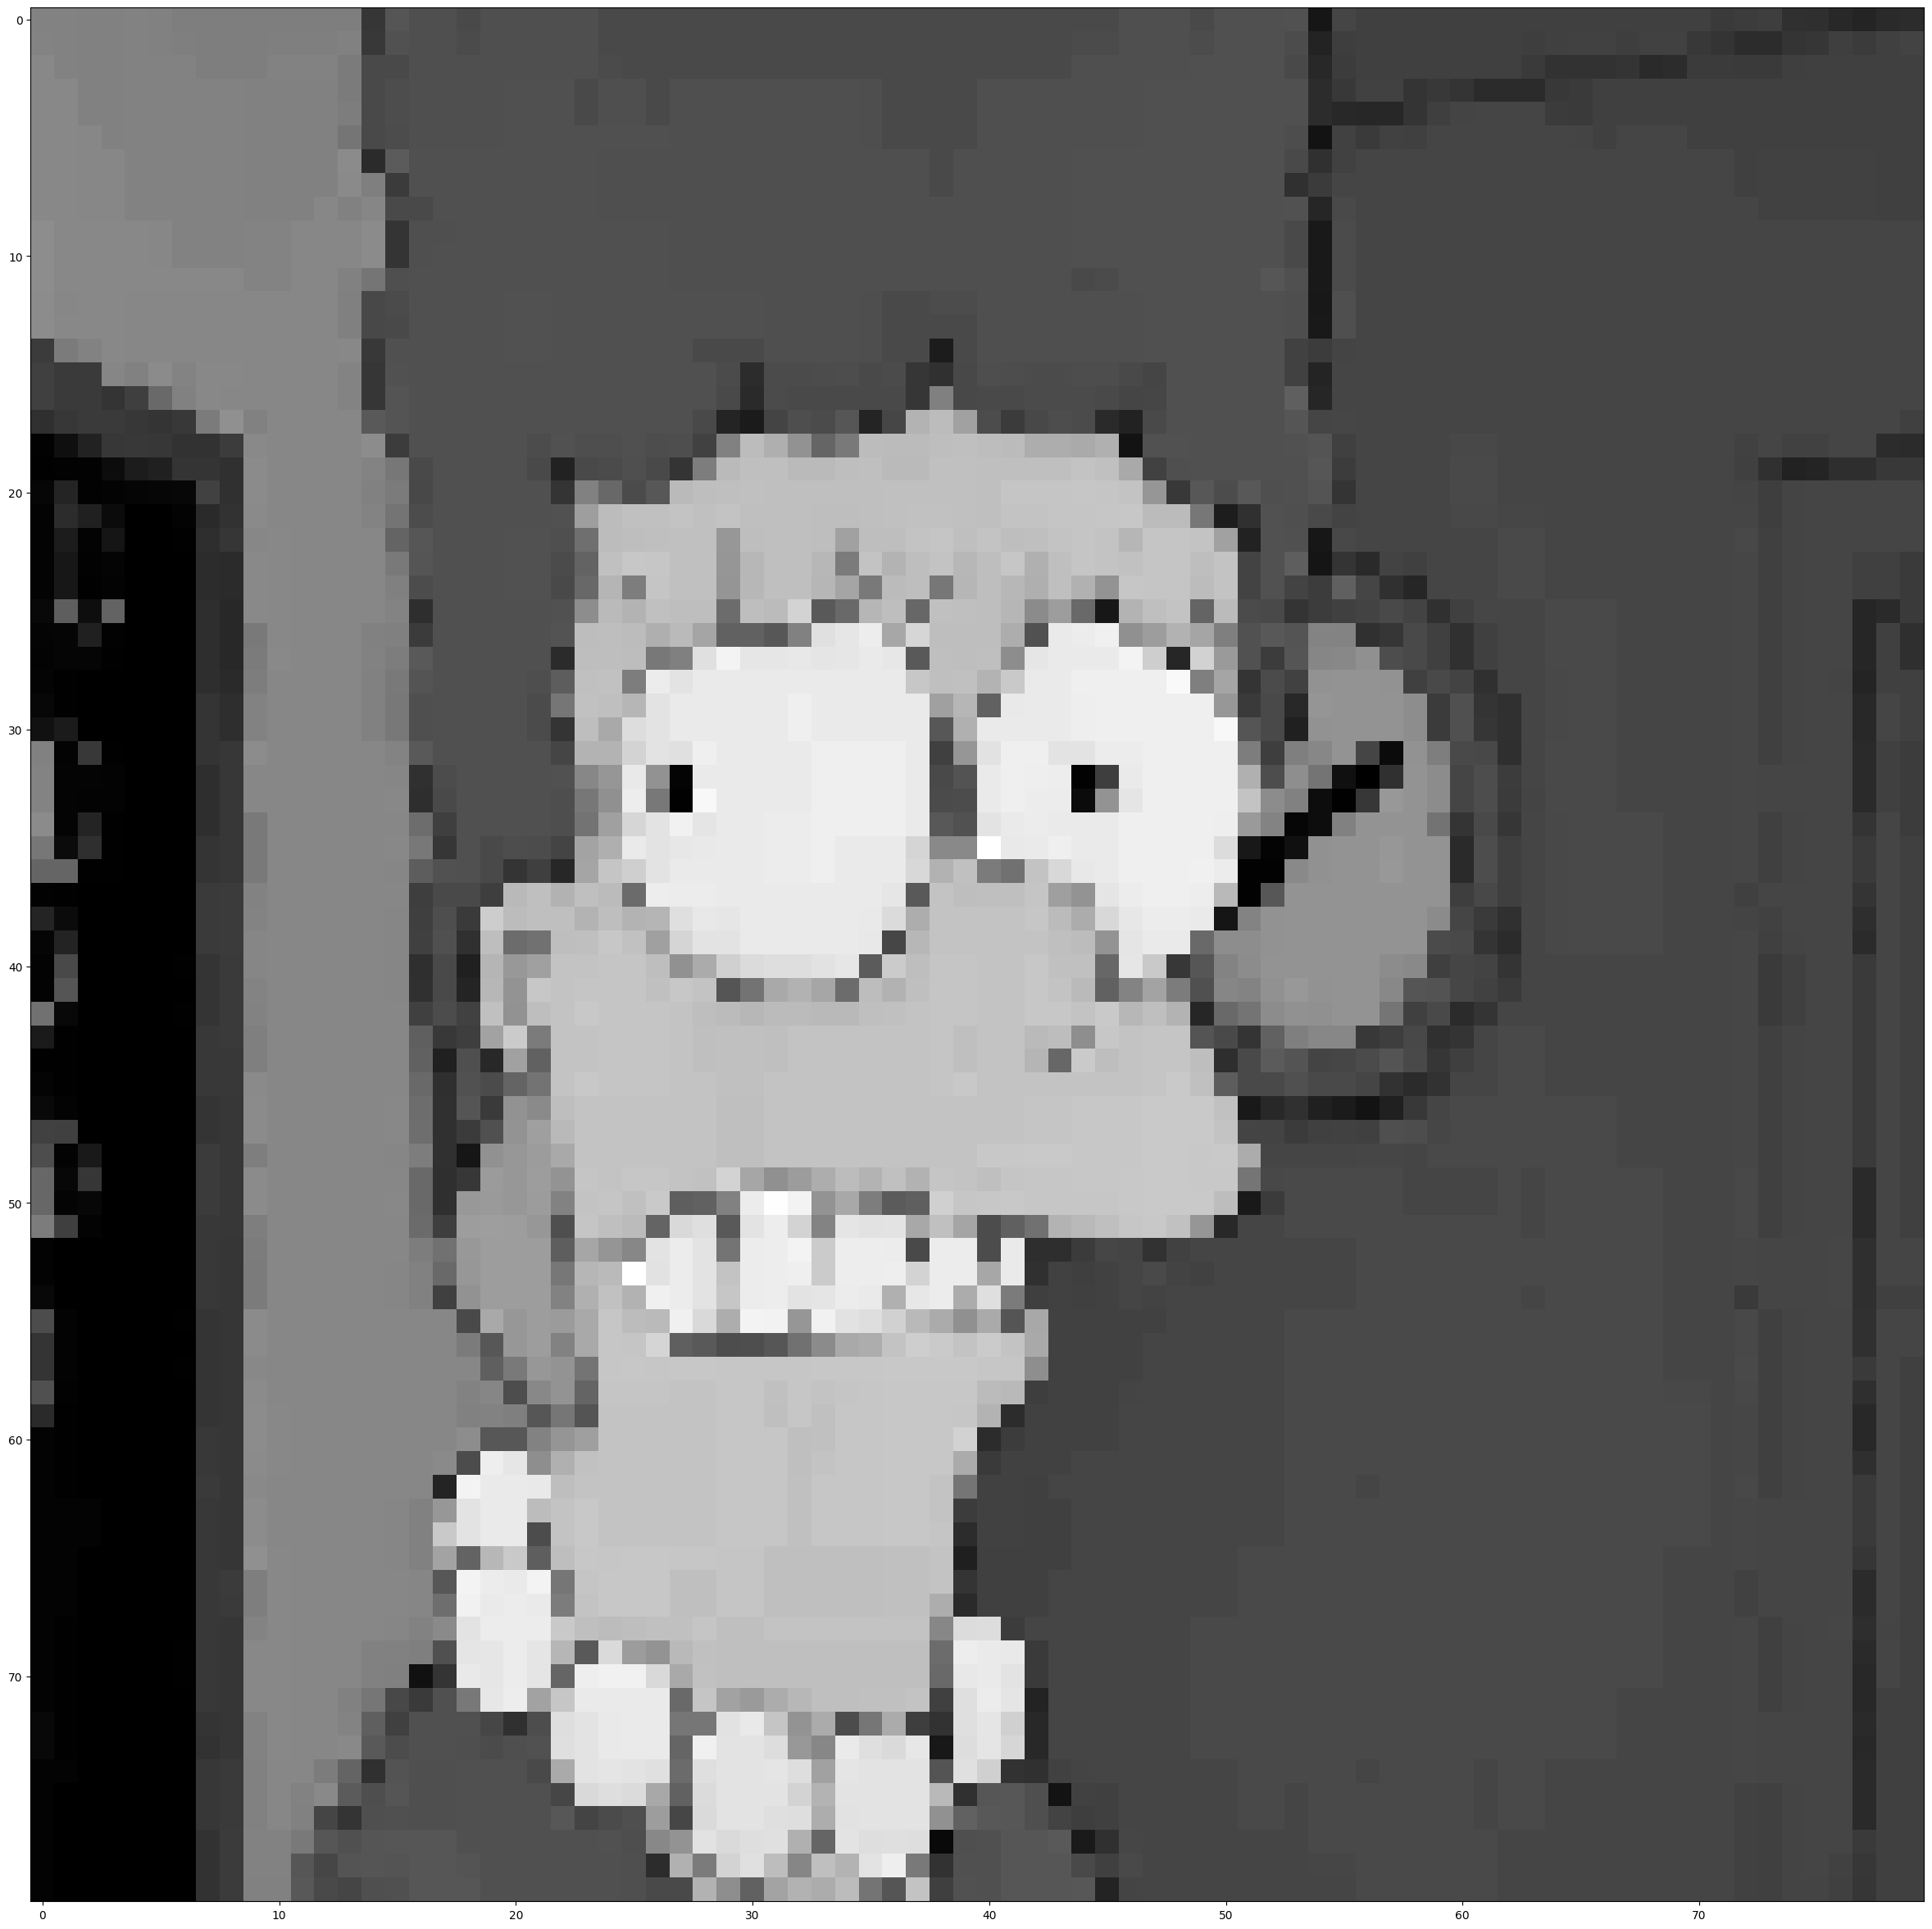

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,30))
plt.imshow(train[0][0], cmap = 'gray')
plt.show()

In [ ]:
#separate training set into features and labels
featureSet , labels = caer.sep_train(train ,  IMG_SIZE = img_size) #reshapefeature set into 4D tensor so data can be fed into model with no restriction

In [ ]:
!pip3 install tensorflow

In [ ]:
from tensorflow.keras.utils import to_categorical
#normalise the featureSet
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels , len(characters))


In [ ]:
x_train , x_val ,y_train  , y_val = caer.train_val_split(featureSet , labels  , val_ratio = 0.2 )


In [ ]:
del train #removing variable we're not gonna be using to save memory
del featureSet
del labels
gc.collect()

0

In [ ]:
#image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train , y_train , batch_size = batch_size )
print(len(train_gen))

313


In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output to feed into dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))  # Using sigmoid for binary classification
learning_rate = 0.1
momentum = 0.9
nesterov = True
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_174 (Conv2D)         (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d_102 (MaxPool  (None, 39, 39, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_175 (Conv2D)         (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_103 (MaxPool  (None, 18, 18, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_176 (Conv2D)         (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_104 (MaxPool  (None, 8, 8, 128)       

In [94]:
EPOCHS = 50
training = model.fit(train_gen , steps_per_epoch = len(x_train)//batch_size , epochs = EPOCHS , validation_data= (x_val , y_val ) , validation_steps= len(y_val)//batch_size )

Epoch 1/50
312/312 [==============================] - ETA: 0s - loss: 0.1643 - accuracy: 0.6688

312/312 [==============================] - 9s 30ms/step - loss: 0.1643 - accuracy: 0.6688 - val_loss: 0.1544 - val_accuracy: 0.6878
Epoch 2/50
312/312 [==============================] - 8s 27ms/step - loss: 0.1559 - accuracy: 0.6848
Epoch 3/50
312/312 [==============================] - 9s 30ms/step - loss: 0.1476 - accuracy: 0.7041
Epoch 4/50
312/312 [==============================] - 9s 29ms/step - loss: 0.1410 - accuracy: 0.7198
Epoch 5/50
312/312 [==============================] - 8s 26ms/step - loss: 0.1349 - accuracy: 0.7340
Epoch 6/50
312/312 [==============================] - 9s 30ms/step - loss: 0.1267 - accuracy: 0.7573
Epoch 7/50
312/312 [==============================] - 9s 28ms/step - loss: 0.1209 - accuracy: 0.7662
Epoch 8/50
312/312 [==============================] - 9s 29ms/step - loss: 0.1156 - accuracy: 0.7797
Epoch 9/50
312/312 [==============================] - 9s 27ms/step - loss: 0.1133 - accuracy: 0.7862
Epoch 10/50
312/312 [==============================] - 9s 30

In [96]:
import cv2 as cv

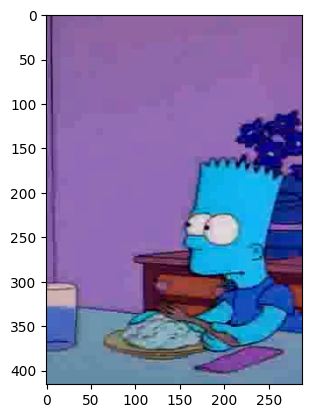

In [102]:
test_path = "/content/drive/MyDrive/Simpsons/SimpsonsDataset/simpsons_dataset/bart_simpson/pic_0027.jpg"
img = cv.imread(test_path)
plt.imshow(img , cmap = 'gray')
plt.show()


In [103]:
def prepare(img):#to prepare our image in required dimensions for testing
  img = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
  img = cv.resize(img , img_size )
  img = caer.reshape(img, img_size , 1)
  return img


In [104]:
predictions = model.predict(prepare(img))


1/1 [==============================] - 0s 18ms/step


In [105]:
predictions


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [106]:
print(characters[np.argmax(predictions[0])])

homer_simpson
